# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


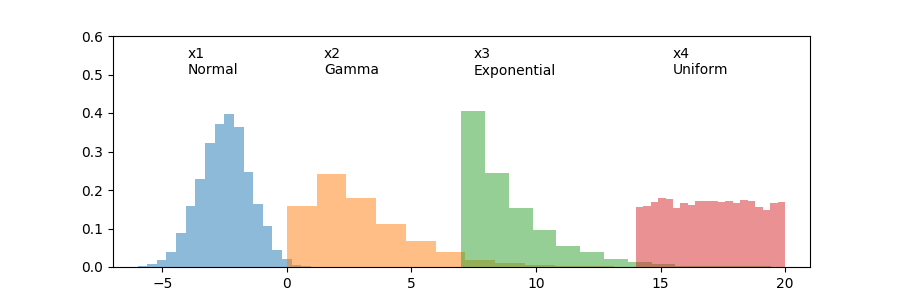

In [10]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


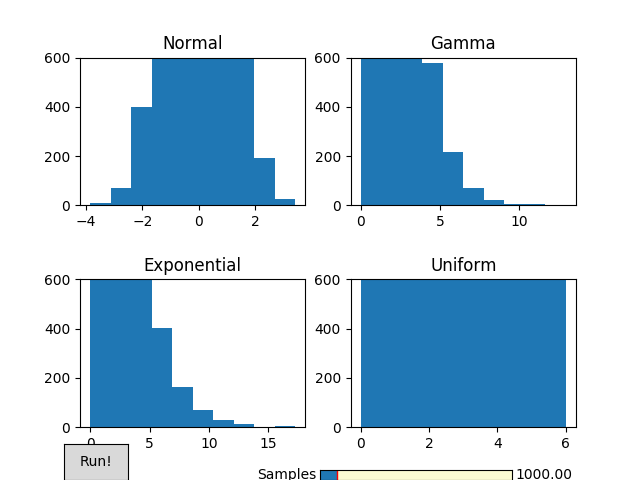

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


0

In [69]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button

%matplotlib notebook

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharey=True)
axs = [ax1,ax2,ax3,ax4]
#plt.ion()

E0_slider_ax = fig.add_axes([0.5, 0, 0.3, 0.02], axisbg=axis_color)
E0_slider = Slider(E0_slider_ax, r'Samples', valmin = 100, valmax = 10000, valinit = 1000)

sample_size = 9000#int(E0_slider.val)






def update(curr):
    
    if curr > sample_size/100:
        a.event_source.stop()    
  
   
    n = 0
    for ax in axs:
        ax.cla() 
        #ax.set_title('n = {}'.format(curr*100))
        ax.hist(samples[n][:curr*100])
        ax.set_title('{}'.format(titles[n]))
        ax.set_ylim(0, 600)
        #ax.set_ymargin(3)
        n= n+1
        plt.subplots_adjust(hspace=0.5)

        



def animate_button(self):    
    # generate 4 random variables from the random, gamma, exponential, and uniform distributions
    x1 = np.random.normal(loc=0.0, scale=1.0, size=int(E0_slider.val))
    x2 = np.random.gamma(2, 1, int(E0_slider.val))
    x3 = np.random.exponential(2, int(E0_slider.val))
    x4 = np.random.uniform(0, 6, int(E0_slider.val))

    titles = ['Normal', 'Gamma', 'Exponential', 'Uniform']

    samples = [x1,x2,x3,x4]

    a = animation.FuncAnimation(fig, update, interval=100)  
    fig.canvas.draw()
#ax2.set_xlim(0, 10)

axnext = fig.add_axes([0.1, 0,0.1, 0.075])
bnext = Button(axnext, 'Run!')
plt.subplots_adjust(hspace=1)
bnext.on_clicked(animate_button)



#plt.show()


<IPython.core.display.Javascript object>


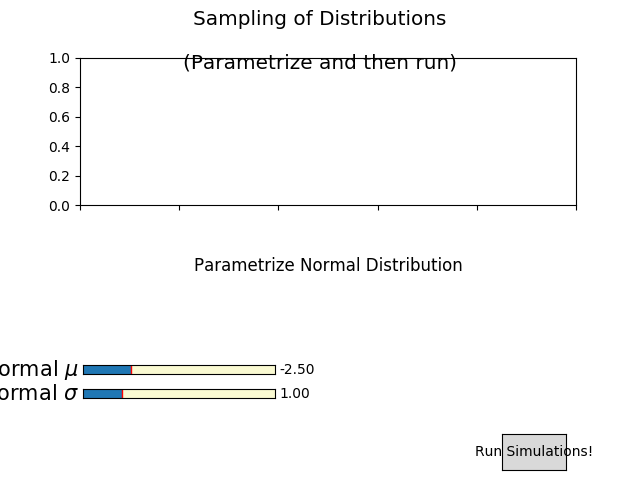

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [57]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button

#create fig
fig,((ax1,ax2))=plt.subplots(2,1,sharex=True)
fig.suptitle("Sampling of Distributions\n\n(Parametrize and then run)", fontsize="x-large")

#sliders axis
ax2=plt.subplot(2, 1, 2)             
ax2.axis('off')
ax2.set_title('\nParametrize Normal Distribution')
axis_color = 'lightgoldenrodyellow'
E0_slider_ax = fig.add_axes([0.13, .22, 0.3, 0.02], axisbg=axis_color)
E1_slider_ax = fig.add_axes([0.13, .17, 0.3, .02], axisbg = axis_color)
E0_slider = Slider(E0_slider_ax, r'Normal $\mu$', valmin = -5, valmax = 5, valinit = -2.5)
E0_slider.label.set_size(15)
E1_slider = Slider(E1_slider_ax, r'Normal $\sigma$', 0, 5, valinit = 1)
E1_slider.label.set_size(15)

#animation function
def update(curr, x1):
    plt.subplot(2, 1, 1)
    plt.cla()


    plt.axis([np.round(np.percentile(x1,.05)),np.round(np.percentile(x1,99.5)),0,1])   #plot 99% cuantile
    plt.hist(x1[:curr*100+100], normed=True, bins=20, alpha=0.5)
    plt.gca().set_title('\n\nNormal n={}'.format(curr*100+100))

#create animation start button
def animate_button(self):
    x1 = np.random.normal(E0_slider.val, E1_slider.val, 5000)
    a = animation.FuncAnimation(fig, update, fargs=(x1, ), frames=100,interval=500, repeat=False)
    fig.canvas.draw()

#animation button
axnext = fig.add_axes([0.785, 0.02,0.1, 0.075], axisbg = axis_color)
bnext = Button(axnext, 'Run Simulations!')
bnext.on_clicked(animate_button)



plt.show()